In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import re
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

#%matplotlip inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts for configuration of the plots we will create


In [2]:
# Read in the Dataset

df = pd.read_csv('movies.csv')

In [3]:
# Let's Look at the Data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Let's see if there is any missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [5]:
# Data types for our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
# change data type of columns and fill null value by 0
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype('int64')
df['votes'] = pd.to_numeric(df['votes'], errors='coerce').fillna(0).astype('int64')
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype('int64')


In [7]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [8]:

def extract_year(text):
    match = re.search(r'\b\d{4}\b', text)
    if match:
        return match.group()
    return None


In [9]:
# Create Correct Year Column
df['yearcorrect'] = df['released'].astype(str).apply(extract_year)

In [10]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [11]:
def reformat_date(text):
        try:
            # Extract the date part from the text
            date_part = text.split('(')[0].strip()
            # Convert the date part to a datetime object
            date_obj = datetime.strptime(date_part, '%B %d, %Y')
            # Reformat the date to the desired format
            return date_obj.strftime('%Y-%m-%d')
        except ValueError:
            return None

# add column released_update after update format
df['released_update'] = df['released'].astype(str).apply(reformat_date)

# add column country_released after after extract country released
df['country_released'] = df['released'].str.extract(r'\((.*?)\)')

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,released_update,country_released
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980,1980-06-13,United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980,1980-07-02,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980,1980-06-20,United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980,1980-07-02,United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980,1980-07-25,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0,2020,2020-10-23,United States
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020,2020-02-07,United States
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN,2020,2020-04-27,Cameroon
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,0,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0,2020,2020-10-01,United States


In [12]:
df = df.sort_values(by=['gross'],inplace=False , ascending = False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,released_update,country_released
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009,2009-12-18,United States
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019,2019-04-26,United States
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997,1997-12-19,United States
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015,2015-12-18,United States
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018,2018-04-27,United States


In [13]:
pd.set_option('display.max_rows',None)

In [ ]:
# Drop Duplicates
df.drop_duplicates()

In [15]:
# Budget high correlation with gross
# company high correlation with gross


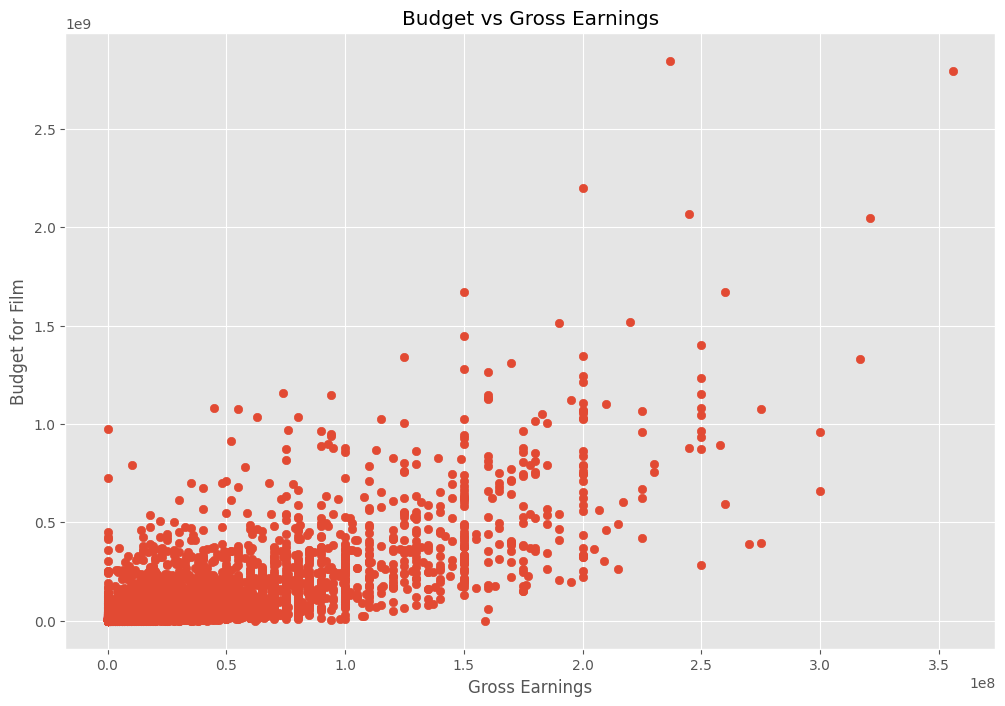

In [16]:
# Scatter plot with budget vs gross
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel("Budget for Film")
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

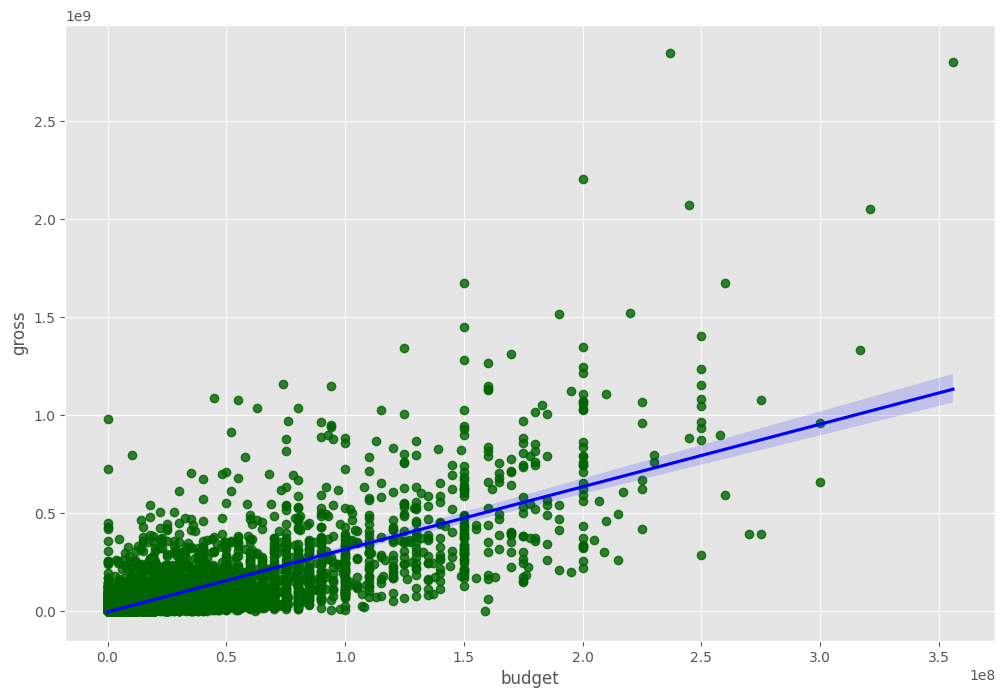

In [17]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget',y='gross',data=df,
            scatter_kws={'color':'darkgreen'},line_kws={"color":"blue"})



In [18]:
# Let's start looking at correlation
correlation_matrix = df.corr(method ='pearson' ,numeric_only=True) # method = (Pearson , Kendall, spearman) pearson is defult
correlation_matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222427,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222427,0.409182,1.000000,0.486931,0.632870,0.309122
budget,0.309212,0.055665,0.486931,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632870,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309122,0.269510,0.245235,1.000000


In [19]:
# High correlation between budget and gross
# I was right

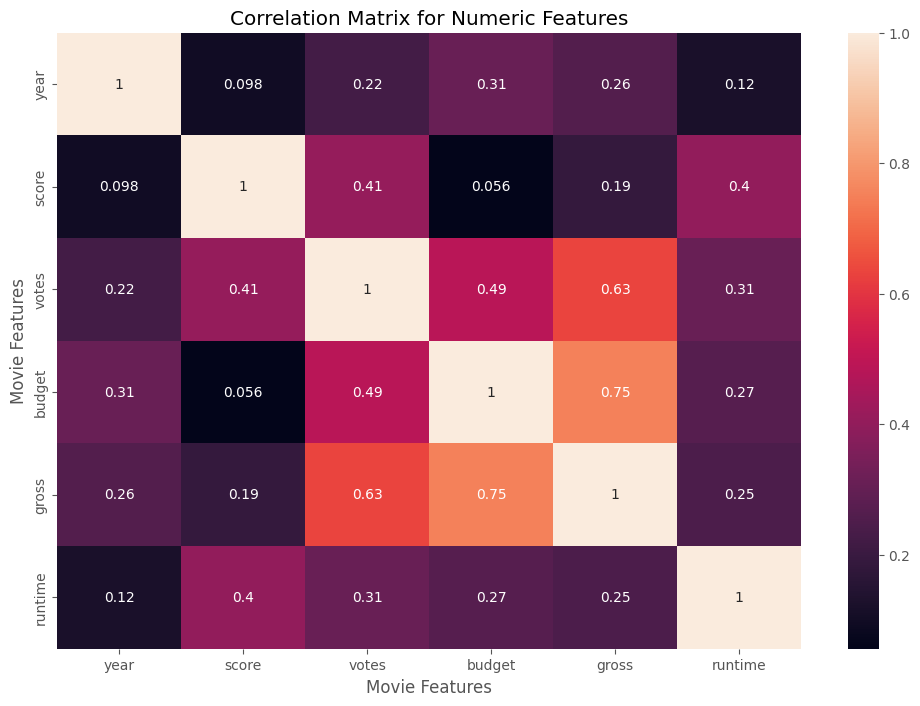

In [20]:
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [21]:
 # Looks at Company
df['company'].unique()

array(['Twentieth Century Fox', 'Marvel Studios', 'Lucasfilm', ...,
       'Gibraltar Entertainment', 'Budapest Stúdió Vállalat',
       'PK 65 Films'], dtype=object)

In [22]:
# convert all object columns to numeric columns
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
       df_numerized[col_name] =  df_numerized[col_name].astype('category')
       df_numerized[col_name] = df_numerized[col_name].cat.codes # random normalization



In [23]:
df_numerized.sample(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,released_update,country_released
1540,3898,4,4,1989,1958,6.4,17000,2913,3553,2778,55,15000000,10763469,2232,124.0,9,561,56
6902,2773,5,0,2016,3013,6.2,165000,2432,841,2640,55,75000000,220021259,731,121.0,36,2635,56
1197,3987,6,6,1987,619,6.6,6000,1828,4293,205,55,25000000,30950002,2319,116.0,7,472,56
5207,3255,6,5,2007,2802,6.2,48000,2388,2865,2635,55,35000000,64811540,1637,92.0,27,1915,56
6456,5802,6,0,2014,3309,7.2,344000,164,3562,639,55,55000000,192330738,731,132.0,34,2472,56
2762,6830,6,5,1995,605,6.8,27000,920,3871,125,55,7000000,529766,1657,115.0,15,1046,56
2381,4037,1,2,1993,1746,6.5,5200,411,3462,1854,54,13000000,6582052,1241,71.0,13,862,56
3314,461,4,2,1998,2916,6.5,149000,811,4236,2778,55,105000000,171757863,889,83.0,18,1244,56
6968,4927,5,4,2016,2021,7.9,88000,1373,3957,819,23,0,13624522,765,106.0,36,2589,25
5283,3884,5,0,2008,1993,6.6,98000,1259,698,2387,55,20000000,41627431,2147,113.0,28,1939,56


In [24]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,released_update,country_released
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009,2009-12-18,United States
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019,2019-04-26,United States
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997,1997-12-19,United States
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015,2015-12-18,United States
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018,2018-04-27,United States


## ***Now we will Look on Correlation between all columns***

In [25]:
# Let's start looking at correlation
correlation_matrix_2 = df_numerized.corr(method ='pearson' ,numeric_only=True) # method = (Pearson , Kendall, spearman) pearson is defult
correlation_matrix_2

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,released_update,country_released
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013038,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.010392,0.010225,0.010492,-0.001968
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033743,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.062145,0.006403,0.003042,0.023977
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145296,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052711,-0.078210,-0.080838,-0.091572
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222427,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.120811,0.996397,0.992979,-0.089289
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.015878,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.000868,-0.003775,0.005774,-0.044096
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.001030,0.399451,0.106295,0.106901,-0.092763
votes,0.013038,0.033743,-0.145296,0.222427,0.015878,0.409182,1.000000,0.000349,0.001127,-0.019146,0.073525,0.486931,0.632870,0.133457,0.309122,0.217782,0.218815,0.091945
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000349,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017624,-0.020385,-0.019843,0.013331
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.001127,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.003511,-0.008391,-0.007283,-0.001201
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019146,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.010174,-0.027606,-0.025442,-0.023540


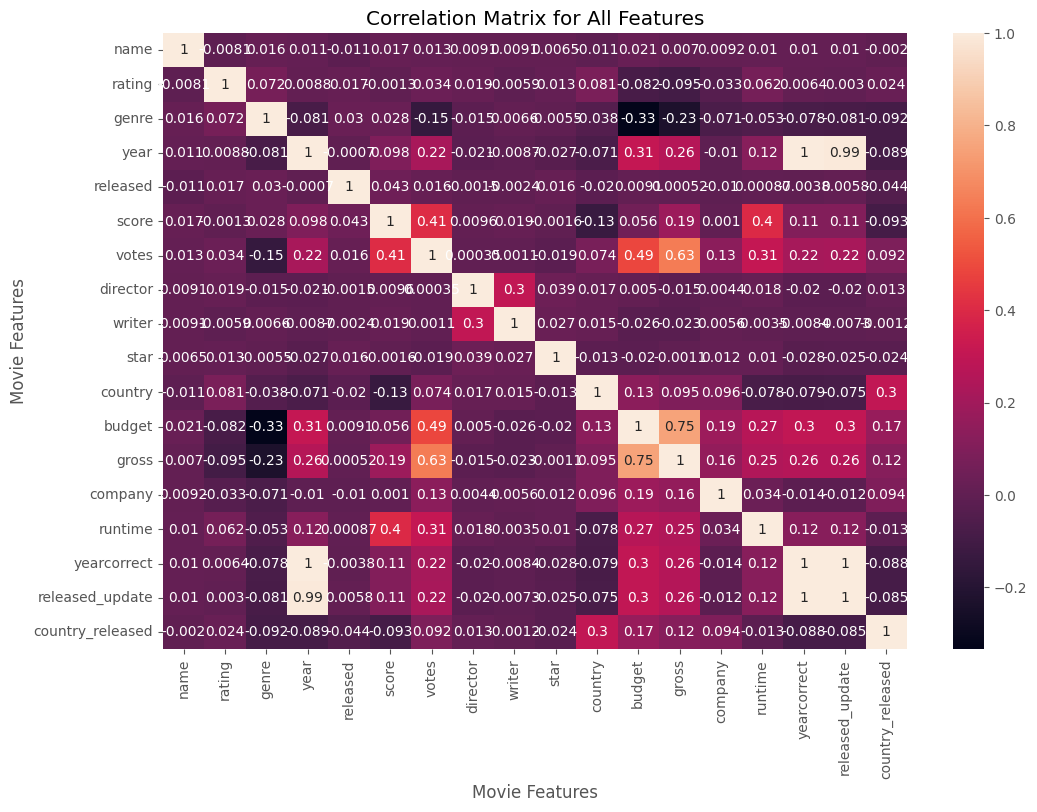

In [26]:
sns.heatmap(correlation_matrix_2,annot=True)
plt.title('Correlation Matrix for All Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [27]:
corr_pairs = correlation_matrix_2.unstack()
corr_pairs

name              name                1.000000
                  rating             -0.008069
                  genre               0.016355
                  year                0.011453
                  released           -0.011311
                  score               0.017097
                  votes               0.013038
                  director            0.009079
                  writer              0.009081
                  star                0.006472
                  country            -0.010737
                  budget              0.020548
                  gross               0.006989
                  company             0.009211
                  runtime             0.010392
                  yearcorrect         0.010225
                  released_update     0.010492
                  country_released   -0.001968
rating            name               -0.008069
                  rating              1.000000
                  genre               0.072423
             

In [30]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget            genre              -0.334021
genre             budget             -0.334021
gross             genre              -0.234297
genre             gross              -0.234297
votes             genre              -0.145296
genre             votes              -0.145296
score             country            -0.133348
country           score              -0.133348
rating            gross              -0.095450
gross             rating             -0.095450
country_released  score              -0.092763
score             country_released   -0.092763
country_released  genre              -0.091572
genre             country_released   -0.091572
year              country_released   -0.089289
country_released  year               -0.089289
yearcorrect       country_released   -0.088402
country_released  yearcorrect        -0.088402
                  released_update    -0.085393
released_update   country_released   -0.085393
budget            rating             -0.081939
rating       

In [31]:
# extract just high correlation
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr


votes             gross               0.632870
gross             votes               0.632870
budget            gross               0.750157
gross             budget              0.750157
year              released_update     0.992979
released_update   year                0.992979
                  yearcorrect         0.995139
yearcorrect       released_update     0.995139
                  year                0.996397
year              yearcorrect         0.996397
name              name                1.000000
yearcorrect       yearcorrect         1.000000
rating            rating              1.000000
genre             genre               1.000000
year              year                1.000000
released          released            1.000000
score             score               1.000000
votes             votes               1.000000
released_update   released_update     1.000000
director          director            1.000000
star              star                1.000000
country      

In [ ]:
# Votes and budget have the hights correlation to gross earnings

# Company has low correlation 
# i was wrong
